<h1><center>Wine Quality Analysis</center></h1>
<h2><center>Group 7</center></h2>
<center>Jenny Robayo Ladino, Namrata Kamthe, Jayanth Jayaraman, Deepak Gunasekaran, Megan Malisani, and Yueming Liu</center>
<br>
<center><i>Under Guidance of Professor Ling Ge</i></center>


___

In [ ]:

__CONTENT__
 - Executive Summary <br>
 - Project Motivation/Background <br>
 - Data Description <br>
 - Data Transformation <br>
 - Exploratory Data Analysis<br>
 - Models and Analysis<br>
     - Linear Regression
     - Support Vector Machine
     - Logistic Regression
     - Decision Tree
     - Random Forest: Best Model
 - Findings and managerial implications<br>
 - Conclusion<br>




 - ## __Executive Summary__

In [ ]:
Our project investigates the relationship between the chemical properties of wine and wine quality.  Through our research, we developed a model that predicts wine quality with 82% accuracy on new wines.  We also gain a deeper understanding of which chemicals matter most and if higher or lower amounts of those chemicals are associated with better wine.

 - ## __Project motivation/background__

In order to learn more about how wine quality and wine chemical properties are related, we are using a dataset that initially was created for a research paper by Paulo Cortez, Antonio Cerdeira, Fernando Almeida, Telmo Matos, and Jose and republished by Elsevierback in November 2009. This dataset is available at: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/version/2It.
 
We had two main goals: 
 - Predict whether new wines have high or low quality. <br>
 - Understand which chemical properties effect quality the most and identify whether higher or lower levels of those properties are more desirable. <br>


 - ## __Data Description__

In [ ]:
Before continuing our study it is necessary to familiarize ourselves with the terminology in order to make the best possible interpretations. For this we can turn to online searches or subject experts.
<br>
The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).
<br>
This datasets is related to red variants of the Portuguese "Vinho Verde" wine.
<br>
<br>
__Fixed acidity__: most acids involved with wine are fixed or nonvolatile (do not evaporate readily).
<br>
__Volatile acidity__: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
<br>
__Citric acid__: found in small quantities, citric acid can add 'freshness' and flavor to wines.
<br>
__Residual sugar__: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
<br>
__Chlorides__: the amount of salt in the wine.
<br>
__Free sulfur dioxide__: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
<br>
__Total sulfur dioxide__: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
<br>
__Density__: the density of water is close to that of water depending on the percent alcohol and sugar content.
<br>
__pH__: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
<br>
__Sulphates__: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
<br>
__Alcohol__: the percent alcohol content of the wine.
<br>
__Quality__: output variable (based on sensory data, score between 3 and 8).

 - ## __Data Transformation__

This dataset did not require significant cleaning.  There were no missing or unreasonable values.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
data = pd.read_csv('winequality-red.csv', sep=',')

In [3]:
import numpy as np

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097

In [6]:
data.isnull().sum() #no missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Classify Quality by the quality values

In [7]:
quality = data["quality"].values
category = []
for num in quality:
    if num<=5:
        category.append(0) #Low
    else:
        category.append(1) #High

In [8]:
category = pd.DataFrame(data=category, columns=["category"])
data_category = pd.concat([data,category],axis=1)

---

- ## __Exploratory Data Analysis__

In [9]:
data_category.shape

(1599, 13)

Our dataset consists now of 1599 observations and 13 variables

In [10]:
data_category.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Our quantitative variables are:
Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulphur Dioxide, Density, pH, Sulphates, Alcohol

Our Qualitative variables are:
Quality and its derived Category. These two will be considered our target variables.

In [11]:
data_category.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


From the table above we can see that most variables fall within a small range with a small standard deviation except Total Sulphur Dioxide with a standard deviation on 32.9. Knowing very little about the specifics of the chemical characteristics, it is hard to tell which values seem too high or too low, for example we dont know if 289, the max value in total sulfate dioxide, is an abnormal or normal value.
I would be interesting to draw plot for each variable based on the category or the quality.

Now we want to find out what levels are desirable for each property. We did not find an exact range for all variables, it seems that the best quality is found by balance among chemicals, not necesarily within a range.
<br>
<br>
Fixed Acidity: A balance is desirable, too much acid would taste like vinegar.
<br>
pH: For red wine between 2.9 to 3.9 is normal.
<br>
Alcohol: Different wines have different levels of alcohol depending on the profile. Generally, low alcohol wine is 12 a moderately low 12. 5 to 13.5 high 13.5 to 14.5 and very high 14.5 and up
<br>
Sugar and alcohol are inversely related, since alcohol is created by the fermentation process in which the yeast processes the sugar turning into ethanol.
<br>
Sugar and alcohol should be negatively related. However in our data we only observe residual sugar.
<br>
'Sweetness and Acidity' balances each other. These should be negatively related.
<br>
Lighter style red wines may have high acidity while heavy bodied red wines tend to have low acidity.
<br>
sources: www.winefolly.com

---

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's see what values appear and how many times

In [13]:
data_category['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

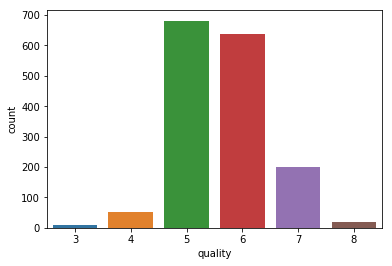

In [14]:
q_hist = sns.countplot(data_category["quality"])

Most of the wines fall into the 5 rating, following by 6.
Data dictionary says quality scores are between 0 and 10 but we dont see any 0, 1,2 9, or 10s in our data.
<br>
If we were to aggregate quality in 3 categories (3,4)(5,6) and (7,8) it would result in a highly unbalanced dataset. This is why we decided to split into 2 categories(3,4,5) and (6,7,8).

In [15]:
data_category['category'].value_counts().sort_index()
print('0 is low quality, 1 is high quality')

0    744
1    855
Name: category, dtype: int64

0 is low quality, 1 is high quality


0 is Low Quality 1 is High Quality


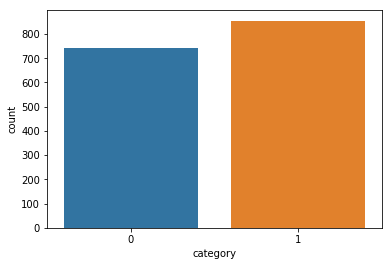

In [16]:
p = sns.countplot(data_category["category"])
print('0 is Low Quality 1 is High Quality')


0 is Low Quality 1 is High Quality


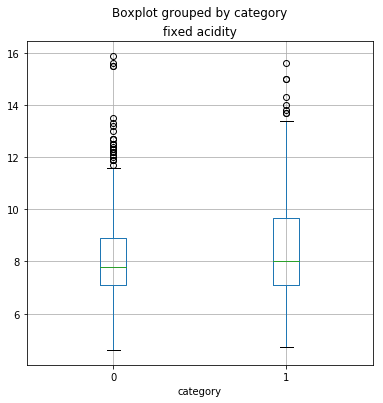

In [17]:
data_category.boxplot('fixed acidity', by = 'category', figsize=(6,6))
print('0 is Low Quality 1 is High Quality')
plt.show()

0 is Low Quality 1 is High Quality


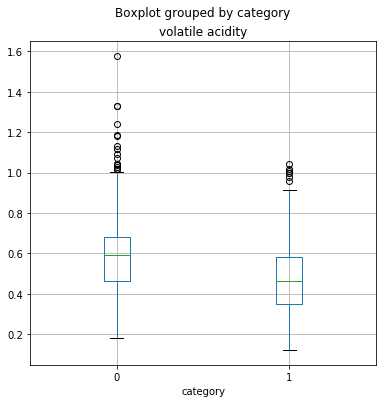

In [18]:
data_category.boxplot(['volatile acidity'], by = 'category', figsize=(6,6))
print('0 is Low Quality 1 is High Quality')

0 is Low Quality 1 is High Quality


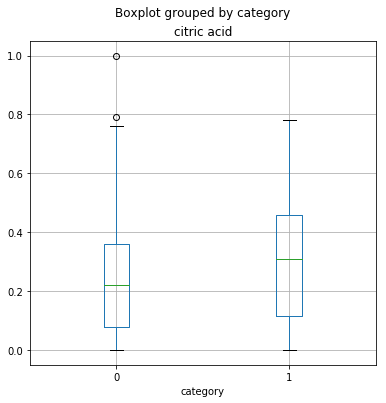

In [19]:
data_category.boxplot('citric acid', by = 'category', figsize=(6,6))
print('0 is Low Quality 1 is High Quality')

Citric Acid may have an outlier

0 is Low Quality 1 is High Quality


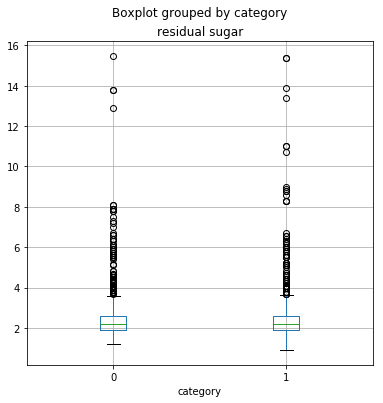

In [20]:
data_category.boxplot(['residual sugar'], by = 'category', figsize=(6,6))
print('0 is Low Quality 1 is High Quality')

0 is Low Quality 1 is High Quality


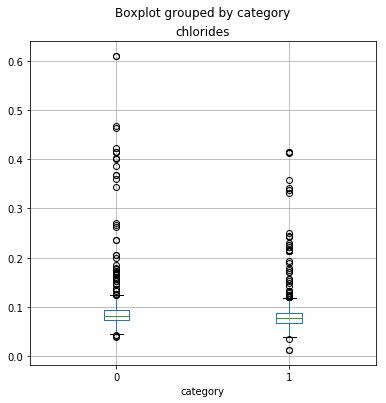

In [21]:
data_category.boxplot('chlorides', by = 'category', figsize=(6,6))

print('0 is Low Quality 1 is High Quality')

0 is Low Quality 1 is High Quality


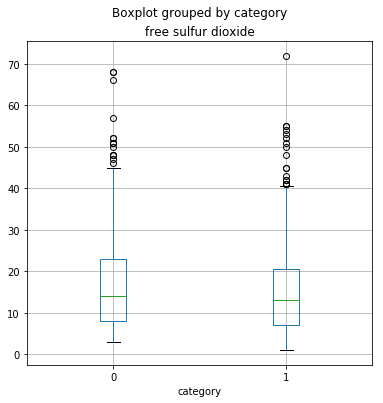

In [22]:
data_category.boxplot('free sulfur dioxide', by = 'category', figsize=(6,6))
print('0 is Low Quality 1 is High Quality')

0 is Low Quality 1 is High Quality


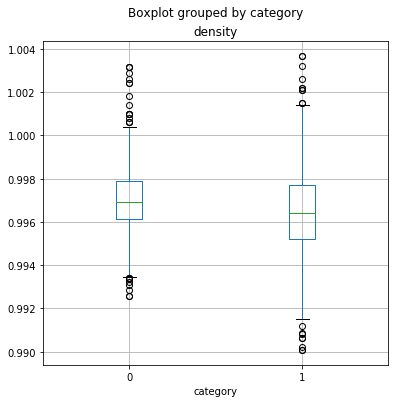

In [23]:
data_category.boxplot('density', by = 'category', figsize=(6,6))
print('0 is Low Quality 1 is High Quality')

0 is Low Quality 1 is High Quality


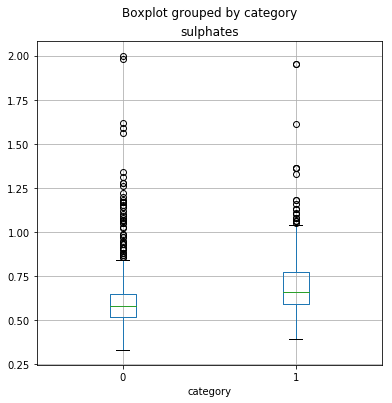

In [24]:
data_category.boxplot(['sulphates'], by = 'category', figsize=(6,6))
print('0 is Low Quality 1 is High Quality')

0 is Low Quality 1 is High Quality


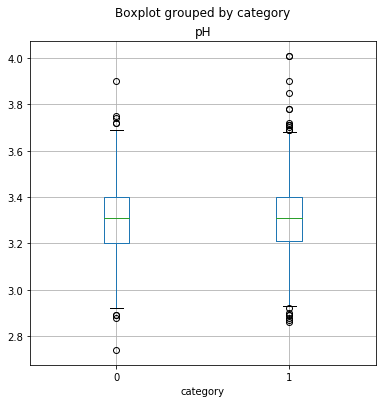

In [25]:
data_category.boxplot('pH', by = 'category', figsize=(6,6))
print('0 is Low Quality 1 is High Quality')

0 is Low Quality 1 is High Quality


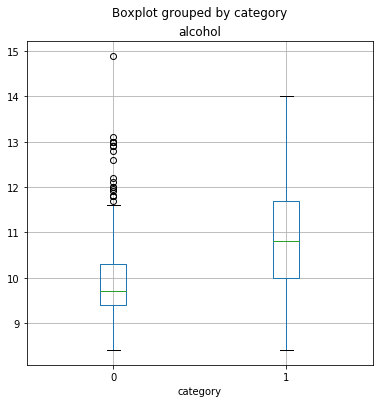

In [26]:
data_category.boxplot('alcohol', by = 'category', figsize=(6,6))
print('0 is Low Quality 1 is High Quality')

From the box plots we can see that many variables have outliers based on IQR.
<br>
Depending on the algorithm being used, we will remove or not as necessary.

<Figure size 864x432 with 0 Axes>

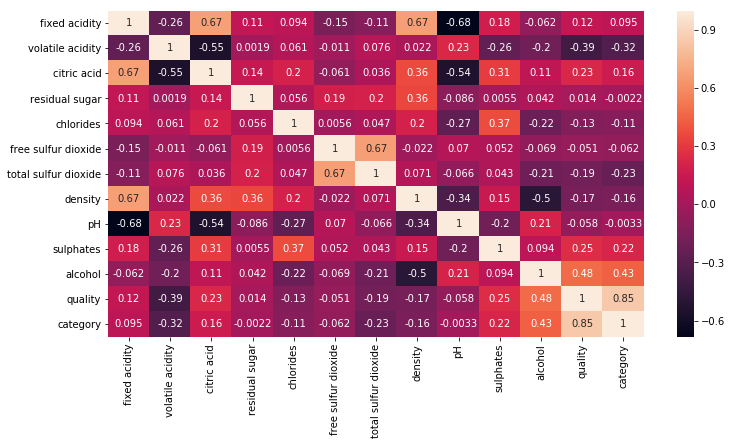

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(data_category.corr(),annot=True)

From the heatmap we want to find those variables that are highly correlated.
<br>
<br>
Since category was derived from quality, it was expected to see high correlation. We will not be using both variables in the same model.

---

In [ ]:
 - ## Linear Regression

In [28]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
#pandas, numpy, seaborn, matplotlib.pyplot already imported

In [29]:
df=data #this is the original dataset, no nulls

In [30]:
# finding correlation of each feature with our target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [31]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [32]:
# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [34]:
print(type(x_train))
x_train.shape
x_test.shape
y_train.shape
y_test.shape

<class 'pandas.core.frame.DataFrame'>


(1199, 10)

(400, 10)

(1199,)

(400,)

In [35]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
# this gives the coefficients of the 10 features selected above. 
regressor.coef_

array([ 0.01773723, -0.99256049, -0.13962865, -1.59094279,  0.00559652,
       -0.00351973,  0.76859036, -0.43741414,  0.81288805,  0.30148385])

In [37]:
# Predictions on our training set
train_pred = regressor.predict(x_train)

In [38]:
# predictions on our testing set
test_pred = regressor.predict(x_test)

In [39]:
# Evaluation Metric RMSE: The higher this value the worse the model
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.6525240995947054

In [40]:
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.627538153923098

The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed. 
<br>
<br>
The RMSE for your training and your test sets should be very similar if you have built a good model.
<br>
<br>
If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.48443407559847157
Mean Squared Error: 0.39380413462920977
Root Mean Squared Error: 0.627538153923098


In [42]:
coefficients = pd.DataFrame(regressor.coef_,features)
coefficients.columns = ['coefficients']
coefficients

,coefficients
fixed acidity,0.017737
volatile acidity,-0.992560
citric acid,-0.139629
chlorides,-1.590943
free sulfur dioxide,0.005597
total sulfur dioxide,-0.003520
density,0.768590
pH,-0.437414
sulphates,0.812888
alcohol,0.301484


Interpretation:<br>
Holding all other features fixed, a 1 unit increase in suplhates will lead to an increase of 0.8 in Quality of wine, and similarly for the other features<br>
Holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of 0.99 in Quality of wine, and similarly for the other features

---

 - ## __Support Vector Machine__

Support Vector Machines (SVM) find optimal hyperplanes that separate observations into groups based on the dependent variable. SVMs often achieve high prediction accuracy. However, non-linear SVM's are not useful for interpretation of independent variables. 

In the best SVM model, gamma parameter=1, C parameter=5, and kernel=radial basis function. The variables used are 'alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity'

<br>Train accuracy=0.761 and test accuracy=0.725.  Using 5-fold cross validation, average accuracy=0.741.  From the comparable accuracy scores, it appears this model does not overfit the data.

In [43]:
from scipy import stats
from sklearn import svm
from sklearn import preprocessing
# matplotlib, seaborn, numpy, pandas, sklearn alredy imported

In [44]:
df=data_category #this has been checked for nulls, and has category

In [45]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Because SVM optimization occurs by minimizing the decision vector, optimal hyperplane is influenced by the scale of features so data should be __standardized__ to have mean=0 and variance=1.
<br>
<br>
Sources: https://towardsdatascience.com/effect-of-feature-standardization-on-linear-support-vector-machines-13213765b812
https://chrisalbon.com/python/data_wrangling/pandas_normalize_column/



In [46]:
# Create x, where x is the 'scores' column's values as floats
scaled_vars = df[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values.astype(float)

In [47]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

In [48]:
# Create an object to transform the data to fit minmax processor
scaled = min_max_scaler.fit_transform(scaled_vars)

In [49]:
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(scaled)

In [50]:
#rename columns
df_normalized.columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [51]:
#merge quality back with the other variables:
#1. get quality variable from original dataset 
df_quality=df[['quality']]
#2. merge
df_temp=pd.merge(df_normalized, df_quality, how='inner', left_index=True, right_index=True)

In [52]:
#merge category back with the other variables:
#1. get category variable from original dataset 
df_category=df[['category']]
#2. merge
df=pd.merge(df_temp, df_category, how='inner', left_index=True, right_index=True)

__Determining Which Variables To Use__<br>
<br>ExtraTreesClassifier was used to gain an understanding of feature importance.
<br>
<br>Larger scores indicater more important attributes.  All the importance scores add up to 100%.  We are using gini criterion, so the values indicate on average across trees how much each feature decreases the weighted impurity.<br>
<br>Here we have have a few variables that contribute more than others, but 7 features are between .08 and .07, indicating pretty comparable contributions by these variables.<br>
<br>Given the feature importance we found the best model using all variable, the most important 6 variables and the most important 4 variables.<br>
<br>The best models created from these 3 variable sets were comparable, so we chose to use the 4 most important variables only as this model performed nearly as well with 7 fewer variables.  For brevity, the code below produces the chosen model only.

__Features in order of importance are__:<br>
'alcohol' .19<br>
'sulphates', .11<br>
'total sulfur dioxide', .10<br>
'volatile acidity',.10  <br>
'citric acid', .08 <br>
'density', .08 <br>
'fixed acidity',.07<br>
'residual sugar', .07<br>
'chlorides', .07<br>
'free sulfur dioxide', .07 <br>
'pH', .07<br>

Source: https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [53]:
#Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# created arrays
X1 = df[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']] 
Y1 = df['category']

#built using 100 trees from bootstrapped samples
model1 = ExtraTreesClassifier(bootstrap=True, random_state=42, n_estimators=100)
model1.fit(X1, Y1)

for feature in zip(X1, model1.feature_importances_):
    print(feature)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

('fixed acidity', 0.07041630722502813)
('volatile acidity', 0.10257153010467411)
('citric acid', 0.07541756922240989)
('residual sugar', 0.06530633455343753)
('chlorides', 0.06815305141915293)
('free sulfur dioxide', 0.06961570003200902)
('total sulfur dioxide', 0.10024372747094641)
('density', 0.08153191401699794)
('pH', 0.06602795943366883)
('sulphates', 0.11451505815164569)
('alcohol', 0.1862008483700296)


In [54]:
#get x and y arrays set up:
X = df[['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity']] 
y = df['category']

Source: https://datatofish.com/multiple-linear-regression-python/

In [55]:
#split into test and train data
#need X and y arrays as inputs
#random_state is the seed
# train_test_split already imported
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.25, random_state=42)

Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

__Next we find optimal tuning parameters__
<br>
<br>
__kernels__: Kernel parameter selects the type of hyperplane used to separate the data. ‘Linear’ uses linear hyperplane (a line in the case of 2D data). ‘Rbf’ and ‘poly’ uses a non linear hyper-plane.
<br>
<br>
__gamma__: Gamma is a parameter for non linear hyperplanes. Higher levels of gamma try to fit the data more precisely.  Increasing gamma too high causes overfitting as the classifier tries to perfectly fit the training data.
<br>
<br>
__the C arguement__: C controls the trade off between smooth decision boundary and classifying the training points correctly.  Very large C values cause a hard margin where data must be separable.  Lower C to soften margin
penalty parameter of the error term. 
<br>
<br>

Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

In [56]:
#setting up a function to find the optimal tuning paramters for your SVM:
from sklearn.model_selection import GridSearchCV
# SVM already imported

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, .5, 1, 2, 3, 4, 5, 10, 50]
    gammas = [0.001, 0.01, 0.1, .5, .7, 1]
    kernels = ['rbf', 'linear', 'sigmoid']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

Source: https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

SVC_param_selection returns optimal function parameters. If optimal values fall toward the middle of our grid, we can be confident they are good choices, but if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.  We am choosing not to test higher values for gamma as gamma above 1 is likely to overfit.

In [57]:
#Apply function to our training data to find optimal parameters
svc_param_selection(X=Xtrain, y=ytrain, nfolds=10)

C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 5, 'gamma': 1, 'kernel': 'rbf'}

In [58]:
#Running model with optimal parameters
model=svm.SVC(kernel='rbf', C=5, gamma=1)
model.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
#accuracy on train data: compare to test accuracy to make sure we aren't overfitting
model.score(Xtrain, ytrain)

0.7606338615512928

In [60]:
#gives accuracy on test data: 
model.score(Xtest, ytest)

0.725

In [61]:
#5fold cross validation accuracy check
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, X, y, cv=5)
scores
(.722+.706+.806+.738+.734)/5

array([0.721875  , 0.70625   , 0.80625   , 0.7375    , 0.73354232])

0.7412

In [62]:
#frequency of good vs bad quality in train data:
ytrain.value_counts()

1    633
0    566
Name: category, dtype: int64

In [63]:
#frequency of good vs bad quality in test data:
ytest.value_counts()

1    222
0    178
Name: category, dtype: int64

In [64]:
#frequency of good vs bad quality in predictions:
np.unique(yfit, return_counts=True)

(array([0, 1], dtype=int64), array([194, 206], dtype=int64))

In [65]:
# A look at model performance for each category:
from sklearn.metrics import classification_report
print(classification_report(y_true=ytest, y_pred=yfit,
                            target_names=['low quality', 'high quality']))



              precision    recall  f1-score   support

 low quality       0.68      0.74      0.70       178
high quality       0.77      0.72      0.74       222

   micro avg       0.72      0.72      0.73       400
   macro avg       0.72      0.73      0.72       400
weighted avg       0.73      0.72      0.73       400



 __Precision__=True Positives/(True Positives + False Positives). measure of accuracy.<br>
<br>
__Recall__=True Positives/(True Positives + False Negatives).<br>
<br>
__F1-score__=2(precision*recall)/(precision + recall). 
F1-score is a helpful metric for comparing two classifiers because it takes precision & recall into account<br>
<br>
__micro average__=averaging the total true positives, false negatives and false positives<br>
<br>
__macro average__=averaging the unweighted mean per label <br>
<br>
__weighted average__=averaging the support-weighted mean per label and sample average (only for multilabel classification).<br>
<br>
Source: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/

In [66]:
### Confusion Matrix of Right vs Wrong Predictions ###
from sklearn.metrics import confusion_matrix
#pandas already imported

confusion_df = pd.DataFrame(confusion_matrix(ytest,yfit),
             columns=["Predicted " + str(class_name) for class_name in ['low quality','high quality']],
             index = ["True " + str(class_name) for class_name in ['low quality','high quality']])

print(confusion_df)

                   Predicted low quality  Predicted high quality
True low quality                     131                      47
True high quality                     63                     159


 - ## __Logistic Regression__ <br>
We wanted to look at logistic regression because it does not require scaling, nor high computation power and provides probability of being high quality for each observation.  It is easy to implement and interpret. However, it is vulnerable to overfitting.

In [142]:
# Pandas and Numpy already imported
#saving the dataframe to a new dataframe 
wine_data_new = data_category

# Binary Category already created --> called: 'category'

#wine_data_new.loc[(wine_data_new['quality'] > 5), 'quality_label'] = 1
#wine_data_new.loc[(wine_data_new['quality'] < 6), 'quality_label'] = 0

In [143]:
#removing outlier based on inter quartile range
feature_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for i in feature_cols:
    q1 = wine_data_new[i].quantile(0.25)
    q3 = wine_data_new[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    wine_data_new = wine_data_new.loc[(wine_data_new[i] > fence_low) & (wine_data_new[i] < fence_high)]

In [144]:
#########LOGISTIC REGRESSION#######################
#pip install statsmodels
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#classification_report, confusion_matrix, metrics already imported

In [145]:
#split dataset in features and target variable
feature_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
X = wine_data_new[feature_cols] # Features
y = wine_data_new.category # Target variable

In [146]:
# split X and y into training and testing sets
#train_test_split already imported
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [147]:
# import the class
from sklearn.linear_model import LogisticRegression

In [148]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [149]:
#view variable coefficients
a=pd.DataFrame(feature_cols)
b=pd.DataFrame(logreg.coef_).transpose()
#a.join(b, how='outer')
a.merge(b, how='outer', left_index=True, right_index=True)

,0_x,0_y
0,fixed acidity,-0.095918
1,volatile acidity,-2.183469
2,citric acid,-0.176044
3,residual sugar,-0.064959
4,chlorides,-0.112291
5,free sulfur dioxide,0.033175
6,total sulfur dioxide,-0.015097
7,density,-0.762461
8,pH,-2.074422
9,sulphates,3.736514


In [150]:
#predict the model using test data
y_pred=logreg.predict(X_test)

In [151]:
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=["Predicted " + str(class_name) for class_name in ['low quality','high quality']],
             index = ["True " + str(class_name) for class_name in ['low quality','high quality']])

print(confusion_df)

print("          ")
print("                  Indepth Classification Report")
print(classification_report(y_test, y_pred))
print("          ")
#printing over all accuracy,specificity and sensitivity.
print("Accuracy of test data:",metrics.accuracy_score(y_test, y_pred))
print("Precision of test data:",metrics.precision_score(y_test, y_pred,average='binary'))
print("Recall of test data:",metrics.recall_score(y_test, y_pred,average='binary'))

                   Predicted low quality  Predicted high quality
True low quality                      88                      27
True high quality                     50                     119
          
                  Indepth Classification Report
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       115
           1       0.82      0.70      0.76       169

   micro avg       0.73      0.73      0.73       284
   macro avg       0.73      0.73      0.73       284
weighted avg       0.74      0.73      0.73       284

          
Accuracy of test data: 0.7288732394366197
Precision of test data: 0.815068493150685
Recall of test data: 0.7041420118343196


---

Following is another option to display previous matrix <br>
source:https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [152]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 88,  27],
       [ 50, 119]], dtype=int64)

([<matplotlib.axis.XTick at 0x14db8ef3860>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x14db8ee4a20>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

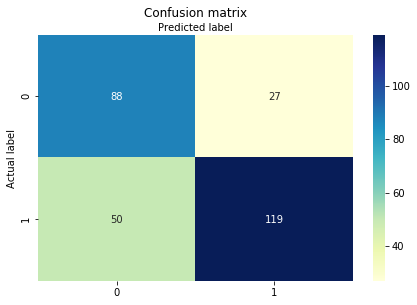

In [153]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [154]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7288732394366197
Precision: 0.815068493150685
Recall: 0.7041420118343196


# Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In our prediction case, when Logistic Regression model predicted wine quality high that wine was 79% of the time.
<br>
<br>
Recall: Wines that are high quality in the test set and Logistic Regression model can identify it 78% of the time

---

__Receiver Operating Characteristic(ROC) curve__ <br>
It is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

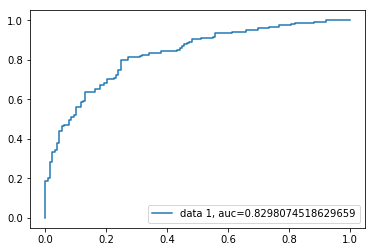

In [80]:
# ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for this case is 0.83 <br>
1 is a perfect classifier, whereas 0.5 is a worthless classifier.

  ## __Decision Trees__

In [81]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# pandas, train_test_split, metrics, classification_report already imported

In [82]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [83]:
# Train Decision Tree Classifer
clf_new = clf.fit(X_train,y_train)

In [84]:
#Predict the response for test dataset
y_pred = clf_new.predict(X_test)

In [85]:
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=["Predicted " + str(class_name) for class_name in ['low quality','high quality']],
             index = ["True " + str(class_name) for class_name in ['low quality','high quality']])

print(confusion_df)
print("            ")
print("                  Indepth Classification Report")
print(classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy of test data:",metrics.accuracy_score(y_test, y_pred))
print("Precision of test data:",metrics.precision_score(y_test, y_pred,average='binary'))
print("Recall of test data:",metrics.recall_score(y_test, y_pred,average='binary'))
print("            ")

                   Predicted low quality  Predicted high quality
True low quality                      94                      35
True high quality                     37                     118
            
                  Indepth Classification Report
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       129
           1       0.77      0.76      0.77       155

   micro avg       0.75      0.75      0.75       284
   macro avg       0.74      0.74      0.74       284
weighted avg       0.75      0.75      0.75       284

Accuracy of test data: 0.7464788732394366
Precision of test data: 0.7712418300653595
Recall of test data: 0.7612903225806451
            


Plotting the confusion matrix in a different format

In [86]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 94,  35],
       [ 37, 118]], dtype=int64)

([<matplotlib.axis.XTick at 0x14db8d209b0>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x14db8d1c6d8>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

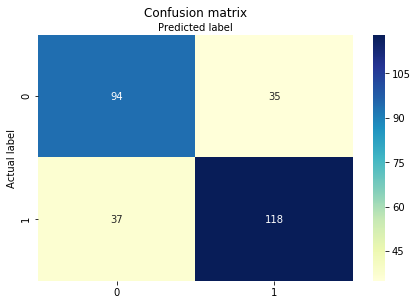

In [87]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In our prediction case, when decision tree model predicted wine quality high that wine was 75% of the time. 

Recall: Wines that are high quality in the test set and decision tree model can identify it 72% of the time

__Decision tree chart__

Below is the decision tree visual to exactly check how the decision tree classified the wine.

In [88]:
#IF ERROR "GRAPHVIZ EXECUTABLES NOT FOUND": pip install GraphViz
# OR FROM TERMINAL: conda install graphviz
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image

In [89]:
# pip install pydotplus
import pydotplus

True

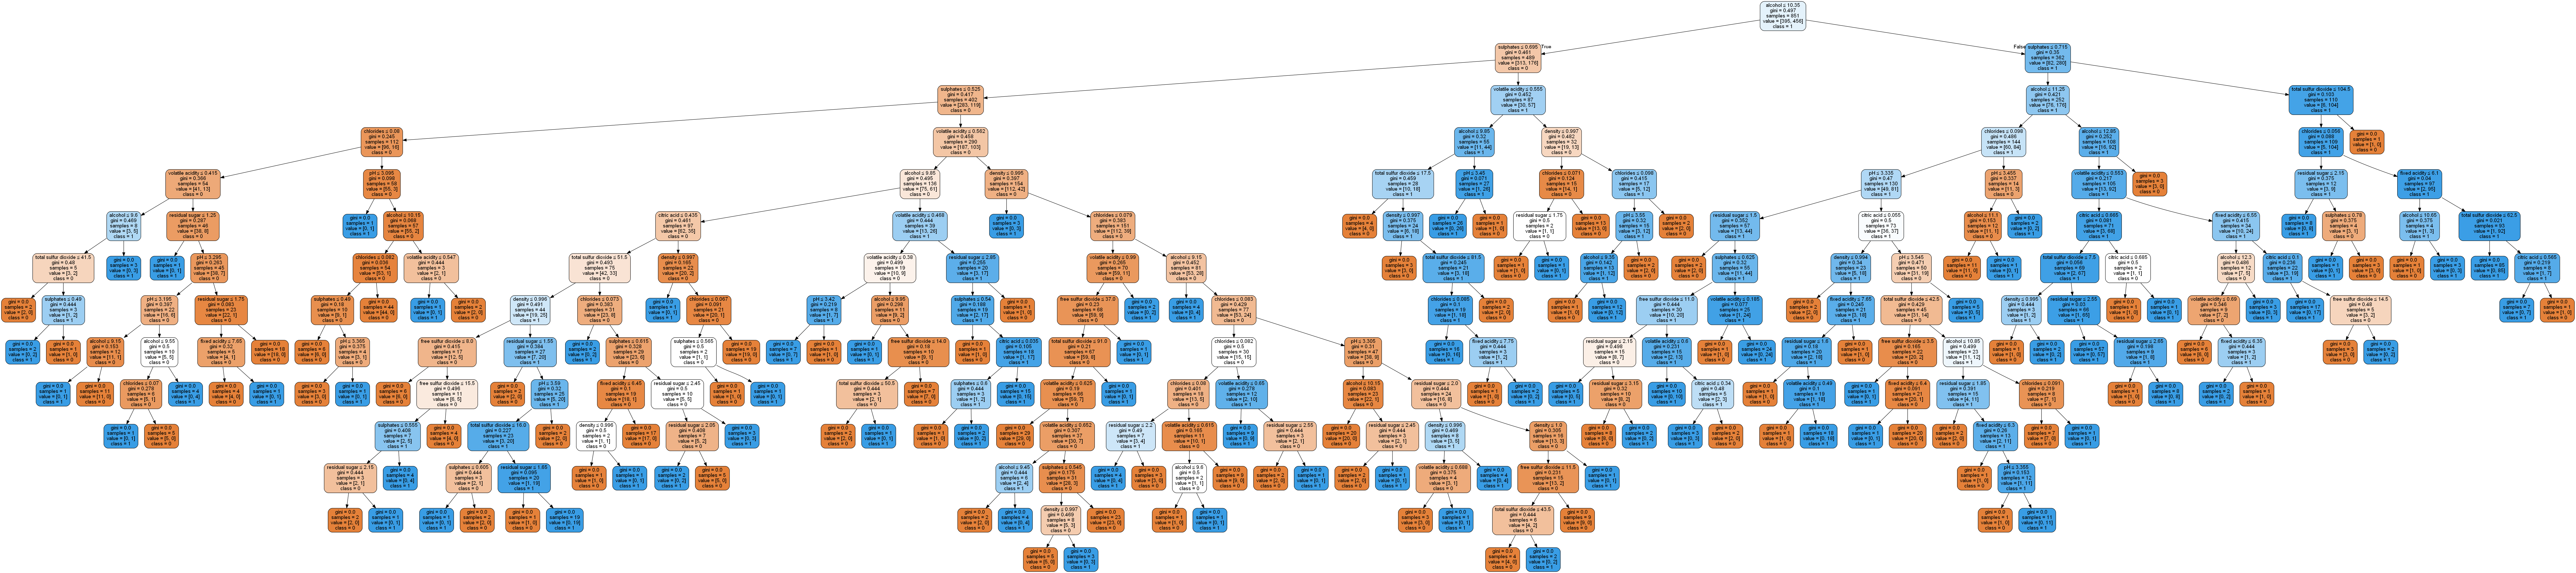

In [90]:
dot_data = StringIO()
export_graphviz(clf_new, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph
graph.write_png('wine_quality.png')
Image(graph.create_png())

____________________________

__Decision tree using entropy criteria and maximum depth of the tree restricted to 4 <br>
optimising the performace of the decision tree with entropy criterian , default is gini index__



In [155]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [156]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [157]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [158]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [159]:
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=["Predicted " + str(class_name) for class_name in ['low quality','high quality']],
             index = ["True " + str(class_name) for class_name in ['low quality','high quality']])

print(confusion_df)
print("            ")
print("                  Indepth Classification Report")
print(classification_report(y_test, y_pred))

                   Predicted low quality  Predicted high quality
True low quality                      76                      39
True high quality                     53                     116
            
                  Indepth Classification Report
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       115
           1       0.75      0.69      0.72       169

   micro avg       0.68      0.68      0.68       284
   macro avg       0.67      0.67      0.67       284
weighted avg       0.68      0.68      0.68       284



In [160]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy of test data:",metrics.accuracy_score(y_test, y_pred))
print("Precision of test data:",metrics.precision_score(y_test, y_pred,average='binary'))
print("Recall of test data:",metrics.recall_score(y_test, y_pred,average='binary'))
print("            ")



Accuracy of test data: 0.676056338028169
Precision of test data: 0.7483870967741936
Recall of test data: 0.6863905325443787
            


True

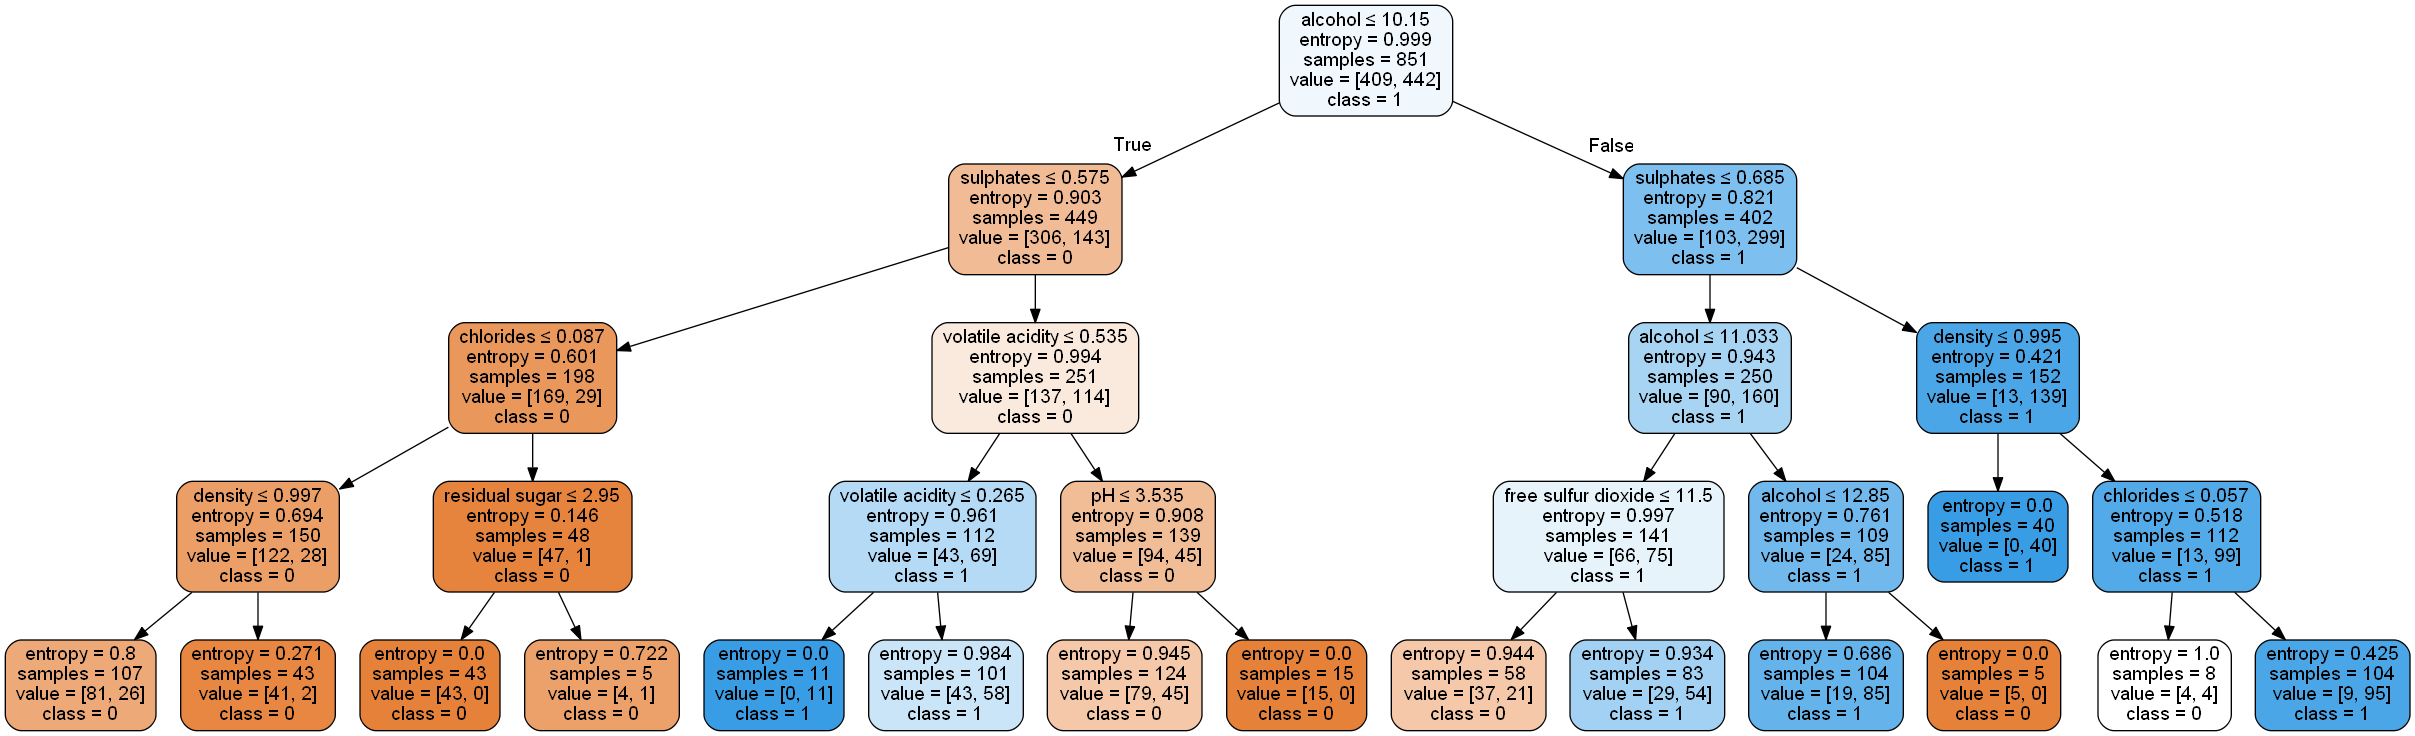

In [161]:
#############decision tree chart with depth 4 #####################
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph
graph.write_png('wine_quality_depth4.png')
Image(graph.create_png())

reducing the depth of the tree reduced the value of accuracy, precision and recall significantly. This shows that as depth of the tree increases the Accuracy also increases significantly. But, there could be a case of overfitting in trees. Hence, we choose to run random forest, which avoids overfitting by taking a average of all trees generated in the forest. 

---

- ## __Random Forrest__

Random forest is a supervised learning algorithm. It can be used both for classification and regression problem. It is also the most flexible and easy to use algorithm. Random forest is an ensemble of decision trees. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution. It usually samples with replacement, with sample size equal to training set size. 


In [110]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [111]:
df=data_category #this has been checked for nulls, and has category
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Pre-processing the Data

In [114]:
# Create x, where x is the 'scores' column's values as floats
scaled_vars = df[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values.astype(float)

In [115]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

In [116]:
# Create an object to transform the data to fit minmax processor
scaled = min_max_scaler.fit_transform(scaled_vars)

In [117]:
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(scaled)

In [118]:
#rename columns
df_normalized.columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [119]:
#merge quality back with the other variables:
#1. get quality variable from original dataset 
df_quality=df[['quality']]
#2. merge
df_temp=pd.merge(df_normalized, df_quality, how='inner', left_index=True, right_index=True)

In [120]:
#merge category back with the other variables:
#1. get category variable from original dataset 
df_category=df[['category']]
#2. merge
df=pd.merge(df_temp, df_category, how='inner', left_index=True, right_index=True)

In [107]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,quality,category
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5,0


In [123]:
#get my x and y arrays set up:
X = df[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']] 
y = df['category']

Source: https://datatofish.com/multiple-linear-regression-python/

In [124]:
#split into test and train data
#need X and y arrays as inputs
#random_state is the seed
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.25, random_state=42)

Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [125]:
#Random Forest Classifier with defaulte parameters
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xtrain, ytrain)
pred_rfc = rfc.predict(Xtest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
#gives accuracy on test data: 79.75% accuracy.
rfc.score(Xtest, ytest)

0.8025

Finding important features
Random forests also offers a good feature selection indicator. It automatically computes the relevance score of each feature in the training phase. This score will help you choose the most important features and drop the least important ones for model building.
Its also very easy to visualize this score with random forest.
I put a threshold value of 0.07 and selected the top 9 variables for my further analysis.

In [128]:
feature_imp = pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

alcohol                 0.190644
sulphates               0.129051
volatile acidity        0.109033
total sulfur dioxide    0.106167
density                 0.089831
chlorides               0.077360
fixed acidity           0.063351
citric acid             0.061901
pH                      0.061378
residual sugar          0.056123
free sulfur dioxide     0.055161
dtype: float64

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


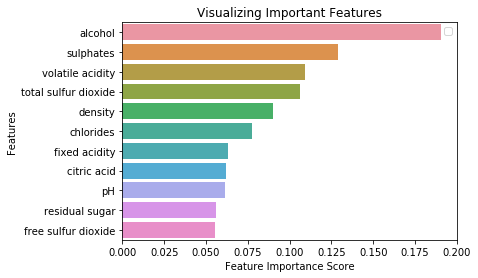

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [130]:
feature_imp = feature_imp[feature_imp > 0.07].index.values.tolist()

In [131]:
feature_imp

['alcohol',
 'sulphates',
 'volatile acidity',
 'total sulfur dioxide',
 'density',
 'chlorides']

In [132]:
X = df[feature_imp]

In [133]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.25, random_state=42)

RandomForestClassfier also has its unique paramters such as n_estimators and n_jobs. The n_estimators is the number of trees in the forest, and n_jobs is the number of jobs to run in parallel, max_depth is The maximum depth of the tree to limit the tree. 

If these parameters are adjusted together,we can get very good prediction on the dataset. I used GridsearchCV to find the optimum values for these parameters
And retrained the model using selected feature variables.

In [134]:
#a function to find the optimal tuning paramters for our classifier:

def param_selection(X, y, nfolds):
   
    param_grid =  {
    'max_depth': [10,20,30,40,50,60,70,80,90,100, 110,150],
    'max_features': [4, 2, 3],
    'n_estimators': [100, 200, 300, 500,1000]
}
    grid_search = GridSearchCV(rfc, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [135]:
#Apply function to our training data to find optimal parameters
from sklearn.model_selection import GridSearchCV
param_selection(X=Xtrain, y=ytrain, nfolds=10)

#returns optimal values

{'max_depth': 110, 'max_features': 2, 'n_estimators': 200}

In [136]:
#Instead of the parameters suggested by GridsearchCV , I used the following parameters as these give the better results
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report , recall_score
rfc = RandomForestClassifier(n_estimators=100,max_depth= 100,max_features=4,random_state=42)
rfc.fit(Xtrain, ytrain)
pred_rfc = rfc.predict(Xtest)

#gives accuracy on test data: 81% accuracy.
accuracy_score(ytest, pred_rfc)
recall_score(ytest, pred_rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

0.78

0.7702702702702703

The new prediction is 78% accurate so random forest gave a satisfactory results on this dataset.

array([[141,  37],
       [ 51, 171]], dtype=int64)

([<matplotlib.axis.XTick at 0x14dba230710>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x14dba01fd68>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix for Random Forest')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

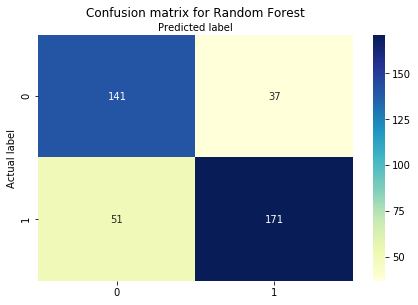

In [137]:
### Confusion Matrix of Right vs Wrong Predictions ###
cnf_matrix = metrics.confusion_matrix(ytest, pred_rfc)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

---

__overall model comparisson__

In [138]:
#Pandas and Matplotlib already installed

,Model Name,Test accuracy
0,Linear regression,62.75
3,support vector machine,72.50
1,logistic regression,72.88
2,decision trees,74.64
4,BEST: random forest,78.00


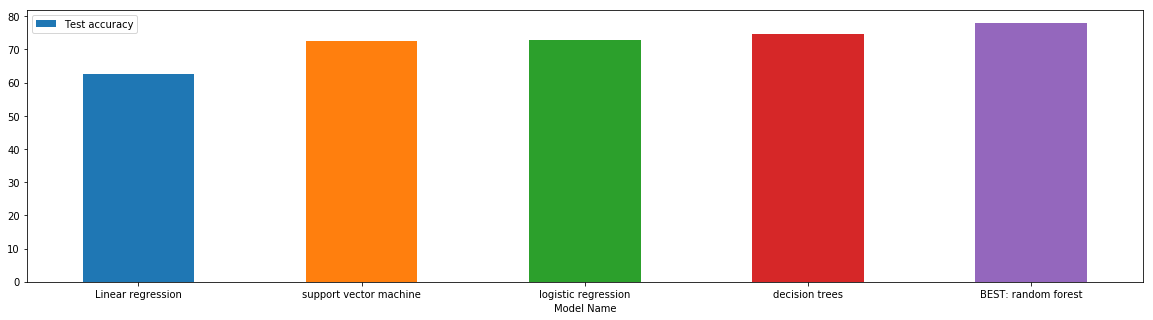

In [162]:
d = {'Model Name': ['Linear regression', 'logistic regression','decision trees','support vector machine','BEST: random forest'], 'Test accuracy': [62.75,72.88,74.64,72.5,78.00]}
df = pd.DataFrame(data=d)

#%matplotlib inline
df1=df.sort_values(by=['Test accuracy'])
df1
ax1 = df1.plot.bar(x='Model Name', y='Test accuracy', rot=0,figsize=(20,5))

 - ## __Findings/Managerial Implications__

__Inference:__

We used random forest to identify which features were most important to determining quality.  From most important to least, the 6 most important were: alcohol, sulphates, volatile acidity, total sulfur dioxide, density, and chlorides.
 
Across our models, higher levels of  alcohol and sulphates were associated with better wine. Lower levels of volatile acidity, total sulfur dioxide, and chlorides were also associated with better quality.
 
It should be mentioned that when a higher level of a chemical is associated with higher wine quality, this means that among the wines in our sample, those with higher levels of the chemical tended to have higher quality. However, for all chemicals, it is reasonable to expect that very low and very high amounts of the chemical will result in low quality.  Managers may use our findings to inform small changes in chemical amounts, but we recommend against changing the amount of any chemical to level not observed in the dataset. 

__Prediction:__

The random forest model is also quite useful as a prediction tool for businesses.  A wine creator who is considering creating a new wine with certain characteristics could use the model to get an estimate of whether his combination of attributes will result in a high- or low-quality wine.  A grocery store could test the characteristics of wines they are considering carrying in their store and only sell new wines that are expected to have high quality.

 - ## __Conclusion__

After investigating our data through linear regression, support vector machines, logistic regression, decision trees, and random forest, we found that the random forest model performed best.
 
Random forest is a flexible, easy to use machine learning algorithm. It produced, even without hyper-parameter tuning, great results on this dataset. One of the big problems in machine learning is overfitting, but it is less likely to happen with a random forest classifier. That’s because if there are enough trees in the forest, the classifier won’t overfit the model.
 
In regard to our initial goals, we did find that some chemical properties are more important to wine quality than others. Details about those chemicals are available in the findings and managerial implications section.  Using the random forest model, we were also able to predict whether new wines have high or low quality with an accuracy of 78%.  Cheers to high accuracy and high quality wine!
